# Data structures

## Data structure

### Passing by value vs passing by reference:

By value: Giving variable values to functions. Functions can can't change the original value.

By reference: Giving variable references to functions. Functions can access and change the original value.

### Passing by value vs passing by reference in Python

Different languages have different ways of differentiating these two types.

- C: variableName (value) vs *variableName (reference)
- Java: primitive types (value) vs non-primitive types (reference) 

Python seems to handle everything via pass-by-value. 

- However, not all types of data are passed by value, e.g., integers, strings.
- The key to discern Python's behavior is: Mutability of the data type. 

### Mutability in Python

Mutability: Whether or not a variable's value can change after being declared.  

In general, all variables in Python are passed by reference. However, only values of mutable data types can be changed, e.g., `list`, `set`, and `dict`. Immutable data types in Python include: `int`, `float`, `tuple`, `bool`, and `str`. 

In [6]:
# What is the value of `a` and `b`?

# What a and b are integers
a = 10
b = a
a *= 2
b -= 5

print(a)
print(b)

In [29]:
# What's really going on?
a = 10
b = a

print(id(a), id(b))

In [31]:
a *= 2
print(id(a), id(b))

4310747936 4310747616


In [32]:
b -= 5
print(id(a), id(b))

4310747936 4310747456


In [33]:
print(a)
print(b)

20
5


In [10]:
# When a and b are lists
a = ["C", "B", "A"]
b = a
a.append("Z")
b.sort()
b.append("A")

print(a)
print(a == b)

['A', 'B', 'C', 'Z', 'A']
True


How Python actually work for immutable data types?

- `my_int = 5`: Python grabs a memory spot and stores '5' in that spot. `my_int` is asked to point to that memory spot with `id(my_int)`. 
- `my_int_2 = my_int`: Python asks `my_int_2` point to the same memory spot as `my_int`.
- `my_int_2 = my_int_2 + 1`: Python creates a new value '6' and grabs a new memory spot to store it. Then it asks `my_int_2` point to the new memory spot as '6' is an immutable data type. 

Basically, for immutable data types, when Python is asked to change its value, it does not change it on the spot. It stores the new value at a new memory location and asks the variable point to the new location instead. Therefore:

- Identical values have identical memory address for immutable data types.
- Each new variable has a new memory address for mutable data types, regardless of the value. 

In [17]:
a = 2
b = 2
print(id(a) == id(b))

a = ['a']
b = ['a']
print(id(a) == id(b))

True
False


## Strings

### What are strings?

Some relevant concepts:

- String: A data structure that holds a list, or string of characters, e.g., `"Hellow world!"`.
- Character: A single letter, number, symbol, or special character, e.g., `"$"`.
- Unicode: A computing industry standard that sets the correspondence between hexadecimal codes and characters, e.g., `U+0024` means `$`.
- Special characters in programming: new line character, tab, etc.

The true complexity lies in trying to teach computers that way we human view and use these strings of characters. For example, how do we teach computers the concepts of

- Ordering: `'A' < 'B'`, `'Aa' < 'Ab'`. 
- Capitalization: To capitalize a sentence means `"Do this instead"` ->  `"Do This Instead".`
- Cases: Recognize different cases, and conversion between different cases.

### Declaring strings in Python

Python seeks the start and end of the string by matching `'`, `"`, or `'''` characters:

- A normal string: `a = "a string"` or `a = 'a string'`
- A string with quotation: `a = "'a string'"` or `a = '"a string"'`
- A string with double quotation: `a = ''' " 'a string' " '''`

In [36]:
a = 'a normal string'
print(a)

a = "'a quotation'"
print(a)

a = ''' " 'a double quotation' " '''
print(a)

a normal string
'a quotation'
 " 'a double quotation' " 


However, we would run into trouble if we wish to declare special characters such as the new line character `\n` or the tab character `\t`. The trick is to use `\` as the escape character. It tells the computer to treat these special characters as normal, e.g, `'\\n'`, `'\\t'`. 

In [48]:
a = 'A tab \t is here. And a new line \n is here.'
b = 'A tab \\t is here. And a new line \\n is here.'
print(a)
print(b)

A tab 	 is here. And a new line 
 is here.
A tab \t is here. And a new line \n is here.


### String concatenation and slicing in Python

Two of the commonly used operations on strings are concatenation and slicing. 

Concatenation: Put two or more strings together to form a new one.

- `my_string_1 + my_string_2`
- `"a string" + my_string_1`
- `my_string_1 += my_string_2`

Slicing: Obstain substrings from a string in Python.

- Using single index: `[index]`
    - `[0]` gets the first, `[-1]`gets the last, and `[i]` gets the (i+1)th character.
    - Zero-based indexing: In early computing age, a variable name points to the first item in the string/list. The index means "how many items do I skip in order to get the target item", e.g., `[3]` says skipping three items from the first tiem, i.e., to obtain the fourth item. 
- Using index range: `[start:end]`, `[start:]`, `[:end]`, `[start:end:space]`
    - Start from the item at index `start` and get a substring with length `end - start`. 
    - Use `space` to get alternate characters, e.g. `[::2]` gets all items at even index. 
- Using negative index
    - `[-n:]`: Starts from the $n$th item from the end.
    - `[:-n]`: Ends at the $n$th item from the end.

In [55]:
my_string_1 = 'First string'
my_string_2 = 'Second string'
print(my_string_1 + '; ' + my_string_2)

print(my_string_1[0])
print(my_string_1[:5])
print(my_string_1[-6:])

First string; Second string
F
First
string


### String searching

Another commonly used operation is searching a certain substring in another string. For example, we would like to know if `my_string_1` is contained in `my_string_2`. 

- Using Python keyword `in` and `not in` for a boolean answer.
    - `'David' in "Today is David's birthday"` would give `True`
    - `'star' not in 'A lot of stairs' ` would also give `True`
- Using `find()`: A method defined for the string data type, e.g., `my_string_1.find('star')`.
    - Find the index of the first instance of the substring. If not found, `-1` is returned.
    - We could specify the start and end of the original string to conduct the search.
- Using `count()`
    - Count the number of times a substring is found in a string.

In [61]:
print('David' in "Today is David's birthday")
print('star' not in 'A lot of stairs')
print(my_string_1.find('string'))
print(my_string_1.count('s'))

True
True
6
2


### Useful string methods in Python

There are some other useful methods that we could use on strings in Python.

- `split(separator)`: Split a string into a list of substrings using the separator.
- Case conversion: Convert a string to a different case.
    - `capitalize()`
    - `lower()`
    - `upper()`
    - `title()`
- `strip(char)`: Strip out all characters of `char` in a string.
- `replace(old, new)`: Replace all `old` substrings with `new` substrings in a string.
- `"-".join(a_list)`: Use "-" to join all string items in a list and form a new string. 

In [73]:
print(my_string_1.split(" "))
print(my_string_1.title())
print(my_string_1.strip("F"))
print(my_string_1.replace('s', 'M'))
print('&'.join(['Chandler ', ' Joey ', ' Ross']))

['First', 'string']
First String
irst string
FirMt Mtring
Chandler & Joey & Ross


### Practice problems

In [1]:
"""Write a function called "in_parentheses"
that accept a single argument, a string
representing a sentence that contains some
strings in parentheses. Your function should
return the contents of the parentheses.

If no text appears in parentheses, return an
empty string. 

You may assume there won't be multiple open
closed parentheses.
"""

# Conditional
def in_parentheses(a_string):
    # Check proper parenthesis
    if '(' not in a_string or ')' not in a_string:
        return ""
    
    start_ix = a_string.find('(')
    end_ix = a_string.find(')')    
    
    return a_string[start_ix+1:end_ix]

# Error-handling
def in_parentheses(a_string):
    try:    
        return a_string[a_string.index('(')+1:a_string.index(')')]
    except ValueError:
        return ""   

print(in_parentheses("This is a sentence (words!)."))
print(in_parentheses("No parentheses here!"))
print(in_parentheses("David tends to use parentheses a lot (as he is doing right now). \
                     It tends to be quite annoying"))
print(in_parentheses("Open ( only."))
print(in_parentheses("Close ) only."))

words!

as he is doing right now




In [22]:
"""Write a function called 'string_type' which
accepts one string argument and determines what type
of string it it.

- If a string is empty, return "empty".
- If it is a character, return "character".
- If it is a word, return "word". It is a word if 
    there's no space in it.
- If it is a sentence, return "sentence". It is a 
    sentence if it contains spaces, but at most one period.
- If it is a paragraph, return "paragraph". It is a 
    paragraph if it contains spaces and multiple periods.
- If it has multiple paragraphs, return "page". It has
    multiple paragraphs when there's new line character.
"""

def string_type(a_string):
    
    if a_string == "":
        return 'empty'
    elif len(a_string) == 1:
        return 'character'
    elif ' ' not in a_string:
        return 'word'
    elif '\n' in a_string:
        return 'page'
    
    no_of_period = a_string.count('.')
    
    if no_of_period <= 1:
        return 'sentence'
    else:
        return 'paragraph'
    
    return 


print(string_type(""))
print(string_type("!"))
print(string_type("CS101."))
print(string_type("There are too many cases!"))
print(string_type("There're way too many ostriches. Why are there  \
                  so many ostriches. The brochure said there'd only be a few ostriches."))
print(string_type("Paragraphs need to have multiple sentences. That's true. \
                  \nHowever, two is enough. Yes, two sentences can make a paragraph."))

empty
character
word
sentence
paragraph
page


In [56]:
"""Write a function called create_username that takes a string 
representing a name as its only parameter. The goal of the function
is to return a string username the represents the input name under
these conditions:

1. The user name starts with first, middle, and last letter of the
person's first name. If the first name is has three or fewer letters,
use the whole first time. If the number of letters in the first name
is even, the middle letter should be the last letter of the first 
half of the first name. This should be followed by the last name.

2. The name portion should be followed by an integer representing 
the length of the person's name.

3. The letters in the username should be lowercase. 

Note: 
We can assume the input name is of the formate "first last".
Do not use split() method.
"""

def create_username(user_input):
    first = user_input[:user_input.find(' ')]
    last = user_input[user_input.find(' ')+1:]
    
    username = ''
    if len(first) <= 3:
        username += first
    else:
        username = first[0] + first[(len(first) - 1) // 2] + first[-1]
        
    username += last
    username += str(len(user_input) - 1)
    username = username.lower()
    
    return username

print(create_username('Ken Jen'))
print(create_username('Stephen Curry'))
print(create_username('徳川 家康'))

kenjen6
spncurry12
徳川家康4


## List-list structures

A type of data structure that holds multiple individual values under one variable name, accessed by numeric indices. Examples in Python include tuple, e.g., `(1,2,'cat',6)`, and list, e.g., `['a', 2, 'b']`.

- Tuple: An immutable form of list-like structure.
- List: A mutable form of list-like strcutre. 

Both of them support holding non-homogenous data types, e.g., a tuple has both integers and strings.

### Tuples in Python

There are two ways which we can use to access items in a tuple:

- Using index: Exactly like how we use indices to access substrings in strings.
- Using unpacking technique: `(a, b, c, d) = a_tuple`. 

Usefulness of tuple: Return multiple items from a function, e.g., `return (a,b,c,d)`. 

In [80]:
a_tuple = (1, 'a', ('b', 'c'))

print(a_tuple[:2])
print(a_tuple[-1])

a, b, c = a_tuple
print(a, b)
print(c)

def a_function():
    a = 1
    b = 0
    return (a, b)

a, b = a_function()
print(a, b)

(1, 'a')
('b', 'c')
1 a
('b', 'c')
1 0


In [84]:
# Tuple is an immutable data type
a_tuple[0] = 2

TypeError: 'tuple' object does not support item assignment

### Lists in Python

Lists are much more commonly used in Python programming. All the things that work with tuples as mention previously work with lists. The big difference is that lists are mutable. Hence we can do all sorts of operations on lists. For example, here are some common ones:

- `a_list.sort()`: Sort the items in `a_list`, default in ascending order. 
- `a_list.reverse()`: Reverse the order of the items.
- `del a_list[i:j]`: Delete `j-i` items from `a_list ` starting from index `i`.
- `a_list.remove(x)`: Delete item `x` from `a_list`.
- `a_list[i] = x`: Assignment value of `x` to the list item at index `i`.

In [92]:
#Write a function called modify_list. modify_list will
#take one parameter, a list. It should then modify the
#list in the following ways, in this order:
#
# - Sort the list (using the default sort method).
# - Reverse the order of the list.
# - Delete the last three items of the list.
# - Removes one instance the integer 7 from the list, if
#   it's present.
# - Double the values of the first and third items in
#   the list.
#
#It should then return the resulting list. You may assume
#the list will start with at least six items.
#
#Hint: Remember Python is 0-indexed. The second item
#does not have an index of 2.
#
#Hint 2: Remember, the list.remove() function removes items
#by value, not by index. Note also that if the item you're
#trying to remove is not found in the list, remove() will
#throw an error: so, you'll want to avoid that one way or
#another!


#Write your code here!
def modify_list(a_list):
    a_list.sort()
    a_list.reverse()
    del a_list[-3:]
    if 7 in a_list:
        a_list.remove(7)
    a_list[0] = a_list[0] * 2
    a_list[2] = a_list[2] * 2

    return a_list                                

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print:
#[178, 81, 75.0, 4, 3.141592653589793, 3]
import math
print(modify_list([7, 4, 3, 2.0, 81, 37.5, 89, math.pi, -2, math.e]))

[178, 81, 75.0, 4, 3.141592653589793, 3]


In [6]:
#Write a function called sum_lists. sum_lists should take
#one parameter, which will be a list of lists of integers.
#sum_lists should return the sum of adding every number from
#every list.
#
#For example:
#
# list_of_lists = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
# sum_list(list_of_lists) -> 67


#Add your code here!
def sum_lists(ls_integers):
    result = 0
    for ls in ls_integers:
        result += sum(ls)
    return result


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print: 78
list_of_lists = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
print(sum_lists(list_of_lists))

78


### Advanced list-like structures

There are more types of list-like structures that have specific advantage for certain applications. They are usually lists with certain restrictions on how items can be accessed or modified. 

- Stacks
    - Only the most recently added item can be accessed. Each subsequent item is accessed by  removing the next recently added one. In inventory management language, it's called first in last out, like stacks of finished goods.
    - One example is the code execution sequence in procedural programming. 
- Queues
    - Items added first are accessed first. Each subsequent item is accessed by removing the previous one. This is also called first in first out, like queues of customers. 
- Linked-lists
    - Linked-lists are different from other lists where each item has an index and can be accessed via a sequence of indices. 
    - The location of an item in a linked-list is only contained in the previous item in the list. 

### Advanced list operations

[18 Most Common Python List Questions](https://www.datacamp.com/community/tutorials/18-most-common-python-list-questions-learn-python#gs.=H0VpEs)

#### Convert lists to dictionaries

In [87]:
helloWorld = ['hello','world','1','2']
dict(zip(helloWorld[::2], helloWorld[1::2]))

{'hello': 'world', '1': '2'}

In [88]:
a = [1, 2, 3, 4, 5]

# Create a list iterator object
i = iter(a)

# Zip and create a dictionary
print(dict(zip(i, i)))

{1: 2, 3: 4}


#### append() vs extend() vs list concatenation/+

In [91]:
# Append [4,5] to `shortList`
shortList = [1]

shortList.append([4, 5])

# Use the print() method to show shortList
print(shortList)

# Extend `longerList` with [4,5]
longerList = [1]
longerList.extend([4, 5])

# Use the print() method to see longerList
print(longerList)

# Concatenate `shortList` with `[4,5]`
plusList = shortList + [4,5]

#Use the `print()` method to see `plusList`
print(plusList)

[1, [4, 5]]
[1, 4, 5]
[1, [4, 5], 4, 5]


#### Shallow vs deep copy of objects

[Shallow vs Deep Copying of Python Objects](https://realpython.com/copying-python-objects/)

In [111]:
# This is your list
objectList = ['a','b',['ab','ba']]

# Copy the `objectList`

# copiedList = objectList[:] # one way of shallow copy
copiedList = list(objectList) # another way of shallow copy

# Change the first list element of `copiedList`
copiedList[0] = 'c'

# Go to the third element (the nested list) and change the second element
copiedList[2][1] = 'd'

# Print out the original list to see what happened to it
print(copiedList)
print(objectList)

['c', 'b', ['ab', 'd']]
['a', 'b', ['ab', 'd']]


In [112]:
import copy

In [113]:
objectList = ['a','b',['ab','ba']]

# Copy the `objectList`
copiedList = copy.copy(objectList)

copiedList[0] = 'c'
copiedList[2][1] = 'd'

print(copiedList)
print(objectList)

['c', 'b', ['ab', 'd']]
['a', 'b', ['ab', 'd']]


In [114]:
objectList = ['a','b',['ab','ba']]

# Copy the `objectList`
copiedList = copy.deepcopy(objectList)

copiedList[0] = 'c'
copiedList[2][1] = 'd'

print(copiedList)
print(objectList)

['c', 'b', ['ab', 'd']]
['a', 'b', ['ab', 'ba']]


#### Counting every element is a list

In [132]:
string = 'a b c d e j f k l a d m a w m'
string = string.split()
print(string)

['a', 'b', 'c', 'd', 'e', 'j', 'f', 'k', 'l', 'a', 'd', 'm', 'a', 'w', 'm']


In [129]:
%timeit [[x,string.count(x)] for x in set(string)]

4.93 µs ± 476 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [123]:
from collections import Counter

In [130]:
%timeit Counter(string)

1.96 µs ± 83.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [134]:
# Your list `x`
x = [1,2,3,4,5,6,7,8,9]

# Split `x` up in chunks of 3
y = zip(*[iter(x)]*3)

# Use `list()` to print the result of `zip()`
list(y)

[(1, 2, 3), (4, 5, 6), (7, 8, 9)]

#### Flattening list of lists

In [162]:
# Your initial list of lists
ls = [['2', 2, 3], [4, 5, 6], [7, 8, 9]]

In [146]:
from functools import reduce

In [163]:
[item for sublist in ls for item in sublist]

['2', 2, 3, 4, 5, 6, 7, 8, 9]

In [164]:
reduce(lambda x,y: x + y,ls)

['2', 2, 3, 4, 5, 6, 7, 8, 9]

In [167]:
sum(ls, [])

['2', 2, 3, 4, 5, 6, 7, 8, 9]

In [161]:
%timeit [item for sublist in ls for item in sublist]

548 ns ± 24.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [160]:
%timeit reduce(lambda x,y: x + y,ls)

476 ns ± 73.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [159]:
%timeit sum(ls, [])

244 ns ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Practice problems

In [184]:
def grade_scantron(answers, keys):
    """Count the number of correct answers."""
    if len(answers) != len(keys):
        return -1
    
#     point = sum([answers[i] == keys[i] 
#                  for i in range(len(answers))])
    point = 0
    for i in range(len(answers)):
        if answers[i] == keys[i]:
            point += 1
    
    return point

test_answers = ['A', 'B', 'B', 'A', 'D', 'A', 'B', 'A', 'E', 'D', 'C', 'E', 'A', 'B', 'E', 'B']
test_key = ['A', 'B', 'B', 'A', 'D', 'E', 'B', 'A', 'D', 'D', 'A', 'B', 'A', 'E', 'D', 'E']

grade_scantron(test_answers, test_key)

9

In [209]:
def find_max_sales(movie_list):
    """Find dict key with highest value."""
    return max(dict(movie_list), key=dict(movie_list).get)

movie_list = [('A', 100), ('C', 200), ('B', 300)]

print(find_max_sales(movie_list))

B


## File input and output

File input and output are complementary processes of saving data to a file and loading data from a file. A file's encoding specifies a set of rules about writing data to that file and loading data from it. In the most basic form, we would concentrate on dealing with text files. 

### Reading, writing, and appending

The basic flow of interacting with files involve:

1. Opening a file and assign it to a variable.
2. Do whatever operations we want with the file, e.g., reading data from it, writing data to it.
3. Close the file after we are done.

When we open the file in a program, we usually specify a mode of interaction. There are three modes:

- Reading, `r`: It means that we are only reading the file and do not intend to modify it.
- Writing, `w`: We are going to erase eveything on it and write some new data into it.
- Appending, `a`: We are going to append some new data to whatever content the file already has.

It's important to specify the mode. Also, opening a file prevents other programs from modifying it. That's why we need to close it too after we're done. 

### Writing files in Python

Basic functions involved in writing data to files:

- `file = open(file_name, mode)`: `file_name` is the address of the write and `mode ` is one of the three above.
- `file.close()`: Closing the file after we're done with our operations.
- `file.write()`: Write one string of text into the file.
- `file.writelines()`: Write a collection of items into the file.
- `print(text, file = file_name)`: This is equivalent to writing `text + '\n'` to the file.

In [1]:
#Write a function called "write_file" that accepts two 
#parameters: a filename and some data that will either 
#be an integer or a string to write. The function 
#should open the file and write the data to the file.
#
#Hints:
#
# - Don't forget to close the file when you're done!
# - If the data isn't a string already, you may need
#   to convert it, depending on the approach you
#   choose.
# - Remember, this code has no print statements, so
#   when you run it, don't expect to see any output
#   on the right! You could add print statements if
#   you want a confirmation the code is done running.
# - You can put the variable for the filename in the
#   same place where we put text like OutputFile.txt
#   in the videos.


#Write your function here!
def write_file(file_name, data):
    file = open(file_name, 'w')
    
    file.write(str(data))
    file.close()
    
    return


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print nothing. However, if you open WriteFileOutput.txt
#in the top left after running it, the contents of the
#file should be 1301.
write_file("WriteFileOutput.txt", 1301)

In [2]:
# Using print function to write files
a = 2
b = 3
c = 'coffee'
file = open('file.txt', 'w')
print(a, file=file)
print(b, file=file)
print(c, file=file)
file.close()

### Reading files in Python

The reverse process of writing data to a file is reading it from a file. By default, Python treates contents read from a file as text. We would need to convert them to other types if needed. Here are some basic functions of reading from a file:

- `file.readline()`: Read the content of a line in the file until the start of the next line.
- `file.readlines()`: Read the content of the file line by line and store them in a list of strings.
- `file.read().splitlines()`: Read the content of the file and split the content into a list of strings using new line character.

In [7]:
#Write a function called "find_coffee" that expects a 
#filename as a parameter. The function should open the 
#given file and return True if the file contains the word 
#"coffee". Otherwise, the function should return False.
#
#Hint: look up the read() method if you want to do this
#more simply than you might do with readline().


#Write your function here!
def find_coffee(filename):
    try:
        file = open(filename, 'r')
    except:
        print('File open error')
        
    file_content = file.read()
    file.close()
    
    return 'coffee' in file_content
    
    

find_coffee('file.txt')

True

In [8]:
#Write a function called "load_file" that accepts one 
#parameter: a filename. The function should open the
#file and return the contents.#
#
# - If the contents of the file can be interpreted as
#   an integer, return the contents as an integer.
# - Otherwise, if the contents of the file can be
#   interpreted as a float, return the contents as a
#   float.
# - Otherwise, return the contents of the file as a
#   string.
#
#You may assume that the file has only one line.
#
#Hints:
#
# - Don't forget to close the file when you're done!
# - Remember, anything you read from a file is
#   initially interpreted as a string.


#Write your function here!
def load_file(file_name):
    file = open(file_name, 'r')
    content = file.readline()
    
    try:
        return int(content)
    except ValueError:
        try:
            return float(content)
        except ValueError:
            return content
    finally:
        file.close()

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print 123, followed by <class 'int'>.
contents = load_file("file.txt")
print(contents)
print(type(contents))

2
<class 'int'>


### Practice problems

In [9]:
def write_1301(file_name, info_list):
    """Write exam information of a student to a file in the required format.
    
    The file name specifies the name of the output file. The info_list is a
    list of tuples. Each tuple contains 5 pieces of information of the student's
    exam, they are in the following format:
    (int, str, int, int, float)
    representing respectively: number, name, marks, highest possible marks, weight.
    """
    
    file = open(file_name+'.txt', 'w')
    for item in info_list:
        for subitem in item:
            print(subitem, end=' ', file=file)
        print('', file=file)
    file.close()
    return

In [10]:
tuple1 = (1, 'exam_1', 95, 100, 0.6)
tuple2 = (2, 'exam_2', 90, 100, 0.4)

tuple_ls = [tuple1, tuple2]
write_1301('output.cs101', tuple_ls)

file = open('output.cs101.txt', 'r')
for line in file:
    print(line.strip())

1 exam_1 95 100 0.6
2 exam_2 90 100 0.4


## Dictionaries

Dictionary is one of many powerful data structures. It is a data structure that holds multiple key-value pairs where keys can be used to look up corresponding values. The idea of dictionary is common in different programming languages. They are similarly known as maps, associative arrays, hashmaps, or hashtables. In dictionary, there's a one-to-one correspondence between a key and a value. Notably, the order of the collection of key-value pairs do not matter in a dictionary, unlike lists. 

### Dictionaries in Python

While strings are declared with `""` and lists are declared with `[]`, dictionaries are declared with `{}` in Python. For example, a simple dictionary with two arbitrary keys and values can be declared as

- `a_dict = {key_1: value_1; key_2: value_2}`

Python requires that dictionary keys have to be an immutable data type such as string or integer. However, dictionaries themselves are mutable. Hence, we can perform vairous operations on the values of items in a dictionary, via their keys:

- Modifying a value: `a_dict[key] = new_value`
- Adding a new item: `a_dict[new_key] = new_value`
- Deleting an item: `del a_dict[key]`
- Checking the presence of an item: `a_key in a_dict`

Another important operation that we often use is traversing through items in a dictionary. We can do so in three common ways:

- `for key in a_dict.keys()`: Go through the list of keys.
- `for value in a_dict.values()`: Go through the list of values.
- `for (key, value) in a_dict.items()`: Go through the list of (key, value) pairs.

In [34]:
#Create a function called tup_to_dict. tup_to_dict should take one
#parameter: a list of tuples. You can assume each tuple in
#the list has exactly two values.
#
#The function should return a dictionary where the first item
#in each tuple is the key, and the second item in each tuple
#is the corresponding value.
#
#For example:
# colors = [("turquoise", "#40E0D0"), ("red", "#990000")]
# tup_to_dict(colors) -> {"turquoise":"#40E0D0", "red":"#990000"}
#
#Hint: the previous exercise is very similar; this just turns
#it into a function! All our tuples will be color name-color
#value pairs.


#Write your function here!
def tup_to_dict(tuple_list):
    new_dict = {}
    for item in tuple_list:
        new_dict[item[0]] = item[1]
        
    return new_dict


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print:  {'Turquoise':'#40E0D0', 'Red':'#990000'}
#
#Don't worry if it prints those in the reverse order; that's
#still correct!
print(tup_to_dict([("Turquoise", "#40E0D0"), ("Red", "#990000")]))

{'Turquoise': '#40E0D0', 'Red': '#990000'}


In [40]:
#Write a function called students_present. students_present
#should take as input one parameter, a dictionary. The keys
#of the dictionary will be names, and the values will be one
#of three strings: "Here", "Present", or an empty string "".
#
#Return a list of the keys for whom the corresponding value
#is either "Here" or "Present".


#Add your code here!
def students_present(input_dict):
    result = []
    for (key, value) in input_dict.items():
        if value == 'Here' or value == 'Present':
            result.append(key)

    return result


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#["David", "Marguerite", "Joshua", "Erica"]

student_list = {"David" : "Here", "Marguerite" : "Here",
                "Jackie": "", "Joshua": "Present",
                "Erica": "Here", "Daniel": ""}
print(students_present(student_list))

['David', 'Marguerite', 'Joshua', 'Erica']


### Simple application of dictionaries

In [70]:
long_string = "Mindfulness meditation is routinely portrayed as a simple, happy, pleasant mind-hack"\
            "that can help improve almost every aspect of our lives. Just a few minutes of mindfulness,"\
            " on a few different occasions, is all it takes to reap the benefits of this life-changing "\
            "practice. If anyone feels hesitant, we’re reminded that it’s just like fitness for the"\
            " mind – and who wouldn’t benefit from a little mental exercise?"

long_string = long_string.replace(',', ' ')
long_string = long_string.replace('.', ' ')
long_string = long_string.replace("’", ' ')
long_string = long_string.replace('?', ' ')

word_dict = {}
for word in long_string.split():
    if word not in word_dict:
        word_dict[word] = 0
    word_dict[word] += 1

print(word_dict)

In [75]:
#Write a function called name_counts. name_counts will take
#as input a list of full names. Each name will be two words
#separated by a space, like "David Joyner".
#
#The function should return a dictionary. The keys to the
#dictionary will be the first names from the list, and the
#values should be the number of times that first name
#appeared.
#
#HINT: Use split() to split names into first and last.


#Add your function here!
def name_counts(names_ls):
    names_dict = {}
    for name in names_ls:
        first, last = name.split()
        if first not in names_dict:
            names_dict[first] = 0
        names_dict[first] += 1
    
    return names_dict


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#{'Shelba': 5, 'Maren': 1, 'Nicol': 1, 'David': 2, 'Brenton': 2}
name_list = ["David Joyner", "David Zuber", "Brenton Joyner",
             "Brenton Zuber", "Nicol Barthel", "Shelba Barthel",
             "Shelba Crowley", "Shelba Fernald", "Shelba Odle",
             "Shelba Fry", "Maren Fry"]
print(name_counts(name_list))


{'David': 2, 'Brenton': 2, 'Nicol': 1, 'Shelba': 5, 'Maren': 1}


In [82]:
#Modify that code in the previous function such that instead 
#of having a count as the value, you instead have a list of 
#the full names that had that first name. So, each key in the 
#dictionary would still be a first name, but the values would 
#be lists of names.
#Make sure to sort the list of names, too.
#
#Name this new function name_lists.


#Add your function here!
def name_lists(names_ls):
    names_dict = {}
    for name in names_ls:
        first, last = name.split()
        if first not in names_dict:
            names_dict[first] = []
        names_dict[first].append(name)
    
    for name in names_dict:
        names_dict[name].sort()
        
    return names_dict


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#{'Shelba': ['Shelba Barthel', 'Shelba Crowley', 'Shelba Fernald', 'Shelba Fry', 'Shelba Odle'],
#'David': ['David Joyner', 'David Zuber'], 'Brenton': ['Brenton Joyner', 'Brenton Zuber'],
#'Maren': ['Maren Fry'], 'Nicol': ['Nicol Barthel']}

name_list = ["David Joyner", "David Zuber", "Brenton Joyner",
             "Brenton Zuber", "Nicol Barthel", "Shelba Barthel",
             "Shelba Crowley", "Shelba Fernald", "Shelba Odle",
             "Shelba Fry", "Maren Fry"]
print(name_lists(name_list))

{'David': ['David Joyner', 'David Zuber'], 'Brenton': ['Brenton Joyner', 'Brenton Zuber'], 'Nicol': ['Nicol Barthel'], 'Shelba': ['Shelba Barthel', 'Shelba Crowley', 'Shelba Fernald', 'Shelba Fry', 'Shelba Odle'], 'Maren': ['Maren Fry']}


### Dictionaries as objects

In [3]:
ANSWER_KEY = {"1" : "A", "2" : "B", "3" : "C", "4" : "D", "5" : "A"}

students={}
students["David"] = {"1" : "A", "2" : "B", "3" : "A", "4" : "B", "5" : "C"}
students["Terra"] = {"1" : "A", "2" : "B", "3" : "C", "4" : "D", "5" : "A"}
students["Lugos"] = {"1" : "A", "2" : "C", "3" : "C", "4" : "D", "5" : "A"}

#For each student and their answers
for (student, answers) in students.items(): 
    grade = 0   #Start grade at 0
    #For each question and answer
    for (question, answer) in answers.items():  
        #If the answer matches ANSWER_KEY's answer...
        if answer == ANSWER_KEY[question]:  
            grade +=1   #Increment their grade
    #Create a new key "grade" and assign it their grade
    students[student]["grade"] = grade  
#For each student and their answers
for (student, answers) in students.items(): 
    #Print the name and grade
    print(student, ": ", answers["grade"], sep = "", end = "; ")

David: 2; Terra: 5; Lugos: 4; 

## Review problems

### Strings

In [22]:
#APA citation style cites author names like this:
#
#  Last, F., Joyner, D., Burdell, G.
#
#Note the following:
#
# - Each individual name is listed as the last name, then a
#   comma, then the first initial, then a period.
# - The names are separated by commas, including the last
#   two.
# - There is no space or comma following the last period.
#
#Write a function called names_to_apa. names_to_apa should
#take as input one string, and return a reformatted string
#according to the style given above. You can assume that
#the input string will be of the following format:
#
#  First Last, David Joyner, and George Burdell
#
#You may assume the following:
#
# - There will be at least three names, with "and" before
#   the last name.
# - Each name will have exactly two words.
# - There will be commas between each pair of names.
# - The word 'and' will precede the last name.
# - The names will only be letters (no punctuation, special
#   characters, etc.), and first and last name will both be
#   capitalized.
#
#Hint: You can use the string replace() method to delete
#text from a string. For example, a_string.replace("hi", "")
#will delete all instances of "hi". There are multiple ways
#you might choose to use this.


#Write your function below!
def names_to_apa(names):
    # clean up
    names = names.replace(',','')
    names = names.replace('and', '')
    names = names.split()
        
    result = ''        
    for i in range(0, len(names), 2):
        result += names[i+1] + ', ' + names[i][0] + '., '
        
    return result[:-2]

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print: Last, F., Joyner, D., & Burdell, G.
print(names_to_apa("First Last, David Joyner, Marshalloo Yang, and George Burdell"))

Last, F., Joyner, D., Yang, M., Burdell, G.


In [2]:
#Write a function called is_palindrome. The function should
#have one parameter, a string. The function should return
#True if the string is a palindrome, False if not.
#
#A palindrome is a sequence of letters that is the same
#forward and backward. For example, "racecar" is a
#palindrome. In determining whether a string is a palindrome
#or not, you should ignore punctuation, capitalization and
#spaces. For example, "Madam in Eden, I'm Adam" is a
#palindrome.
#
#You may assume that the only characters in the string will
#be letters, spaces, apostrophes, commas, periods, and
#question marks.
#
#Hint: Before checking if the string is a palindrome, get
#rid of the spaces and punctuation marks using the replace()
#method and convert the entire string to upper or lower
#case using the upper() or lower() methods.
#
#Hint 2: There are multiple ways to do this! If you're stuck
#on one way, try a different one. You could use string
#slicing, a for loop, or some string methods. Or, try
#printing the string at different stages to see what's going
#wrong!


#Write your function here!
def is_palindrome(a_string):
    a_string = a_string.lower()
    
    filtered = ''
    for char in a_string:
        if ord(char) > 97 and ord(char) < 122:
            filtered += char
    
    if filtered == filtered[::-1]:
        return True
    else:
        return False

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print: True, True, False, each on their own line.
print(is_palindrome("racecar"))
print(is_palindrome("Madam in Eden, I'm Adam"))
print(is_palindrome("Mister in Eden, I'm Eve"))

True
True
False


In [3]:
%timeit is_palindrome("Madam in Eden, I'm Adam")

3.24 µs ± 182 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
#Write a function called check_formula. The check_formula
#function should take as input one parameter, a string. It
#should return True if the string holds a correctly
#formatted arithmetic integer formula according to the rules
#below, or False if it does not.
#
#For this problem, here are the rules that define a
#correctly-formatted arithmetic string:
#
# - The only characters in the string should be digits or
#   the five arithmetic operators: +, -, *, /, and =. Any
#   other characters, including spaces, periods, commas,
#   or any letters, are not permitted.
# - There may not be any consecutive arithmetic operators.
#   Any arithmetic operator must have a number on either
#   side of it.
# - There must be an equals sign in the formula.
#
#You do not need to worry about negative numbers or
#parentheses, and you do not need to worry about whether
#the equation is accurate. You may also assume all the
#numbers in the string will be only one digit.
#
#Here are some examples of valid and invalid arithmetic
#formulas:
#
#   Valid     Invalid
#   5*3=5+2   5*3+5+2 (no equals)
#   5=7       5= (equals sign isn't in the middle)
#   5=2-5     50=-5 (consecutive arithmetic operators)
#   6/2=5/2   a=51 (illegal character)
#             -5=5+2 (starts with an operator)
#
#Hint: Remember, as soon as you find *one* thing wrong
#with the string, you know it's invalid and can return
#False. So, go character-by-character through the string
#checking everything that could be wrong. If you don't
#find anything wrong, return True!


#Write your function here!
def check_formula(formula):
    # Check has =
    if '=' not in formula:
        return False
    
    valid_chars = '0 1 2 3 4 5 6 7 8 9 - + * / ='.split()
    
    for i in range(len(formula)):
        # Check any invalid char
        if formula[i] not in valid_chars:
            return False
        
        # For each char in between
        if i > 0 and i < len(formula)-1:
            if formula[i] in valid_chars[-5:]:
                # Check no consecutive operators
                if formula[i-1] in valid_chars[-5:]:
                    return False
        # Check no operator at start and end
        elif formula[i] in valid_chars[-5:]:
            return False
    return True


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print True, then several Falses.
print(check_formula("5*3=5+2"))
print(check_formula("5*3+5+2"))
print(check_formula("5="))
print(check_formula("5=-5"))
print(check_formula("a=5"))
print(check_formula("-5=5+2"))

True
False
False
False
False
False


#### Tic-tac-toe and Connect-4

In [55]:
#In the game tic-tac-toe, two players take turns drawing
#Xs and Os on a 3x3 grid. If one player can place three of
#their symbols side-by-side in a row, column, or diagonal,
#they win the game.
#
#For example:
#
# X Wins:   X Wins:   X Wins:   No Winner:
# X|O|X     O|X|X     O|O|      X|O|O
# -+-+-     -+-+-     -+-+-     -+-+-
# O|O|X     X|O|      X|X|X     O|X|X
# -+-+-     -+-+-     -+-+-     -----
# O|X|X      | |O      | |      X|X|O
#
#Write a function called check_winner. check_winner will
#take one parameter as input, a 2D tuple (that is, a tuple
#of tuples). The 2D tuple represents the game board: each
#smaller tuple in the larger tuple is a row of the board,
#and each item in the smaller tuple is a spot on the
#board. There will always be three tuples in the larger
#tuple, and three items in each of the smaller tuples.
#
#Each item in the smaller tuple will always be one of three
#values: the string "X", the string "O", or the value None.
#
#check_winner should return one of three values: the string
#"X" if X has won the game; the string "O" if O has won the
#game; or the value None if there is no winner. None should
#NOT be the string "None"; it should be the value None,
#like the boolean values True and False.
#
#You may assume a player has won the game if and only if
#the board has three of their symbols in a row: you do not
#need to worry about whether the input is a valid game
#otherwise (e.g. a board of nine Xs still counts as X
#winning). You may assume that there will only be one
#winner per board.
#
#Hint: There are only eight possible places to win (three
#rows, three columns, two diagonals).
#
#Hint 2: If you're comfortable on time, you may want to
#check out the last problem before doing this one. It's
#only worth 1 point, but you might be able to design
#one solution that works for both problems!


#Write your function here!
def check_winner(tuples):
    diags = []
    for i in range(3):
        # Check row winners
        if tuples[i][0] == tuples[i][1] and tuples[i][1] == tuples[i][2]:
            return tuples[i][0]
        
        # Check column winners        
        if tuples[0][i] == tuples[1][i] and tuples[1][i] == tuples[2][i]:
            return tuples[0][i]
        
    # Check diagnoal winners
    if tuples[0][0] == tuples[1][1] and tuples[1][1] == tuples[2][2]:
        return tuples[0][0]
    if tuples[0][2] == tuples[1][1] and tuples[1][1] == tuples[2][0]:
        return tuples[0][2]
    
    return None

#The code below shows how the tic-tac-toe tuples are
#created and tests your code with three games: one where
#X wins, one where O wins, and one where there is no winner.
#Remember, the line breaks in xwins and owins are optional:
#they're just to make the declarations more readable. They
#could be written the same as nowins.
xwins = (("X", "O", "X"),
         ("O", "O", "X"),
         ("O", "X", "X"))
owins = (("O", "X", "X"),
         ("X", "O", None),
         (None, None, "O"))
game_board = (('O', 'X', 'X'), 
              ('O', 'X', 'O'), 
              ('X', 'O', 'X'))
nowins = (("X", "O", "O"),("O", "X", "X"),("X", "X", "O"))

print(check_winner(xwins))
print(check_winner(owins))
print(check_winner(game_board))
print(check_winner(nowins))

X
O
X
None


In [222]:
#Last problem, you implemented a function that could find if
#someone had won a particular game of tic-tac-toe based on a
#2D tuple representing the current game board.
#
#In this problem, you'll do the same thing, but for Connect
#4 instead of tic-tac-toe. Write another function called
#check_winner which takes as input a 2D list. It should
#return "X" if there are four adjacent "X" values anywhere
#in the list (row, column, diagonal); "O" if there are four
#adjacent "O" values anywhere in the list; and None if
#there are neither.
#
#Here are the ways Connect-4 is different from tic-tac-toe:
#
# - Connect-4 is played with 6 rows and 7 columns, not 3
#   rows and 3 columns.
# - You must have 4 in a row (or column or diagonal) to win
#   instead of 3.
# - You may only place pieces in the bottom-most empty
#   space in a column (e.g. you "drop" the pieces in the
#   column and they fall to the first empty spot). Note,
#   though, that this shouldn't affect your reasoning.
#
#To keep things simple, we'll still use "X" and "O" to
#represent the players, and None to represent empty spots.
#You may make the same assumptions as the previous
#problem: only one winner per board, no characters besides
#"X", "O", and None, and you don't have to worry about
#whether the board is actually a valid game of Connect 4.
#
#Hints:
# - Don't forget both kinds of diagonals!
# - This board is too large to check every possible place
#   for a winner: there are 69 places a player could win.
# - Remember, if you put a negative index in a list,
#   Python "wraps around" and checks the last value. You
#   may have to control for this.


#Write your function here!
def check_winner(tuples):
    # Remove empty rows from top
    top_empty_loc = 0
    for i in range(len(tuples)):
        if set(tuples[i]).issubset({None}):
            top_empty_loc += 1
    tuples = tuples[top_empty_loc:]
    
    n_rows = len(tuples)
    n_cols = len(tuples[0])
    
    for row in range(n_rows):
        for col in range(n_cols):
            if tuples[row][col] == None:
                continue
            try:
                # Check horizontal
                if (tuples[row][col] == tuples[row][col+1] 
                    and tuples[row][col+1] == tuples[row][col+2]
                    and tuples[row][col+2] == tuples[row][col+3]):

                    return tuples[row][col]
            except IndexError:
                next
            
            try:
                # Check vertical
                if (tuples[col][row] == tuples[col+1][row]
                      and tuples[col+1][row] == tuples[col+2][row]
                      and tuples[col+2][row] == tuples[col+3][row]):

                    return tuples[col][row]
            except IndexError:
                next
            
            try:
                # Check right diag
                if (tuples[row][col] == tuples[row+1][col+1]
                      and tuples[row+1][col+1] == tuples[row+2][col+2]
                      and tuples[row+2][col+2] == tuples[row+3][col+3]):

                    return tuples[row][col]   
            except IndexError:
                next
            
            try:
                # Check left diag
                if (tuples[row][col] == tuples[row+1][col-1]
                      and tuples[row+1][col-1] == tuples[row+2][col-2]
                      and tuples[row+2][col-2] == tuples[row+3][col-3]):

                    return tuples[row][col]   
            except IndexError:
                next 
        
    return None
                        
                    # Check right diag
            


#The code below tests your function on three Connect-4
#boards. Remember, the line breaks are not needed to create
#a 2D tuple; they're used here just for readability.
xwins = ((None, None, None, None, None, None, None),
         (None, None, None, None, None, None, None),
         (None, None, None, None, "X" , None, None),
         (None, None, None, "X" , "O" , "O", None),
         (None, "O" , "X" , "X" , "O" , "X", None),
         ("O" , "X" , "O" , "O" , "O" , "X" , "X"))
owins = ((None, None, None, None, None, None, None),
         (None, None, None, None, None, None, None),
         ("O" , "O" , "O" , "O" , None, None, None),
         ("O" , "X" , "X" , "X" , None, None, None),
         ("X" , "X" , "X" , "O" , "X" , None, None),
         ("X" , "O" , "O" , "X" , "O" , None, None))
nowins =(("X" , "X" , None, None, None, None, None),
         ("O" , "O" , None, None, None, None, None),
         ("O" , "X" , "O" , "O" , None, "O" , "O" ),
         ("O" , "X" , "X" , "X" , None, "X" , "X" ),
         ("X" , "X" , "X" , "O" , "X" , "X" , "O" ),
         ("X" , "O" , "O" , "X" , "O" , "X" , "O" ))
         
print(check_winner(xwins))
print(check_winner(owins))
print(check_winner(nowins))

X
O
None


In [223]:
%timeit check_winner(xwins)

4.86 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Can we do better?

In [192]:
import numpy as np
from scipy.signal import convolve2d

In [224]:
horizontal_kernel = np.array([np.ones(4)])
vertical_kernel = np.transpose(horizontal_kernel)
right_diag_kernel = np.diag(np.ones(4))
left_diag_kernel = np.fliplr(right_diag_kernel)

kernel_ls = [horizontal_kernel, vertical_kernel, 
            right_diag_kernel, left_diag_kernel]

def transform_game_borad(game_board):
    game_board = np.asarray(game_board)
    game_board[game_board == 'X'] = 1
    game_board[game_board == 'O'] = -1
    game_board[game_board == None] = 0
    game_board = np.asarray(game_board, dtype=int)  
    
    return game_board

def check_winner(game_board, kernel_ls):
    for kernel in kernel_ls:
        convolve_result = convolve2d(game_board, kernel, mode='valid')
        
        if (convolve_result == 4).any():
            return 'X'
        elif (convolve_result == -4).any():
            return 'O'
    return None

In [225]:
game_board = transform_game_borad(xwins)

In [226]:
%timeit check_winner(game_board, kernel_ls)

56.4 µs ± 8.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### File input and output

In [11]:
#Write a function called write_book_info. write_book_info
#will take as input two parameters: a string and a list of
#3-tuples.
#
#The string will represent the filename to which to write.
#
#Each 3-tuple in the list will contain three strings: a
#book title, the book's author, and the book's ISBN number.
#
#write_book_info should write the list of books to the file
#given by the filename using the following format:
#
# ISBN: Title by Author
#
#So, for this list:
#
# [("Of Mice and Men", "John Steinbeck", "978-0-140-17739-8"),
#  ("Introduction to Computing", "David Joyner", "978-1-260-08227-2")]
#
#The file printed would look like this:
#
# 978-0-140-17739-8: Of Mice and Men by John Steinbeck
# 978-1-260-08227-2: Introduction to Computing by David Joyner
#
#We've included Sample.txt to show you what a longer version
#of one of these files might look like.


#Write your function here!
def write_book_info(file_name, book_ls):
    with open(file_name, 'w') as file:
        for item in book_ls:
            title, author, isbn = item
            print(f'{isbn}: {title} by {author}', file=file)

    return 

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print nothing -- however, it should write the same contents
#as Sample.txt to Test.txt.
books = [('Harry Potter and the Goblet of Fire', 'J. K. Rowling', '978-0-74-754624-5'), 
         ('Twilight', 'Stephenie Meyer', '978-1-90-423365-7'), 
         ('A Short History of Tractors in Ukrainian', 'Marina Lewycka', '978-0-14-102052-5'), 
         ('Notes from a Small Island', 'Bill Bryson', '978-0-55-299600-6'), 
         ('For We Are Many', 'Dennis Taylor', '978-1-68-068059-1'), 
         ("Jamie's Italy", 'Jamie Oliver', '978-0-71-814770-9')]
write_book_info("Test.txt", books)

### Dictionaries

In [9]:
#Write a function called pivot_library. pivot_library takes
#as input one parameter, a list of 3-tuples. Each tuple in
#the list has three items: the first item is a book title
#(a string), the second item is the book's author (a
#string), and the third item is the book's ISBN number (a
#string).
#
#pivot_library should return a dictionary. In the dictionary
#that it returns, the keys should be the ISBN numbers, and
#the values should be 2-item tuples. In each tuple, the first
#item should be the book title, and the second item should
#be the author's name.
#
#Hint: Unpack the tuple to variables first, then create the
#new dictionary item.
#
#For example:
#
# books = [("Of Mice and Men", "John Steinbeck", "978-0-140-17739-8"),
#          ("Introduction to Computing", "David Joyner", "978-1-260-08227-2")]
# pivot_library(books)
#   -> {"978-0-140-17739-8": ("Of Mice and Men", "John Steinbeck"),
#       "978-1-260-08227-2": ("Introduction to Computing", "David Joyner")}


#Write your function here!
def pivot_library(book_ls):
    book_dict = {}
    for item in book_ls:
        title, author, isbn = item
        book_dict[isbn] = (title, author)

    return book_dict

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#
#{"978-0-140-17739-8": ("Of Mice and Men", "John Steinbeck"), "978-1-260-08227-2": ("Introduction to Computing", "David Joyner")}
books = [("Of Mice and Men", "John Steinbeck", "978-0-140-17739-8"), ("Introduction to Computing", "David Joyner", "978-1-260-08227-2")]
print(pivot_library(books))

{'978-0-140-17739-8': ('Of Mice and Men', 'John Steinbeck'), '978-1-260-08227-2': ('Introduction to Computing', 'David Joyner')}


In [ ]:
#Write a function called volume_and_area. volume_and_area
#will take in a dictionary. This dictionary is guaranteed to
#have three keys: "length", "width", and "height", whose
#values are integers representing three attributes of a
#rectangular prism (also known as a box).
#
#Modify this dictionary to add two keys: "volume" and "area".
#The values associated with these keys should be the volume
#and surface area of the box.
#
#The formula for volume is:
#  length * width * height
#
#The formula for surface area is:
#  2 * ((length * width) + (length*height) + (width*height))
#
#Because length, width, and height are integers, and because
#these formulas have no division, your results should be
#integers as well.


#Add your code here!
def volume_and_area(box_dict):
    length = box_dict['length']
    width = box_dict['width']
    height = box_dict['height']
    
    box_dict['volume'] = length * width * height
    box_dict['area'] = 2 * (length * width + length * height 
                            + height * width)
    
    return  box_dict


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print 6 and 22, each on a different line.
rectangle = {"length": 1, "width": 2, "height": 3}
rectangle = volume_and_area(rectangle)
print(rectangle["volume"])
print(rectangle["area"])

In [309]:
#-----------------------------------------------------------
#Write a function called no_you_pick. no_you_pick should
#have two parameters. The first parameter is a dictionary
#where the keys are restaurant names and the values are lists
#of attributes of those restaurants as strings, such as
#"vegetarian", "vegan", and "gluten-free".
#
#The second parameter is a list of strings representing of
#necessary attributes of the restaurant you select.
#
#Return a list of restaurants from the dictionary who each
#contain all the diet restrictions listed in the list,
#sorted alphabetically. If there are no restaurants that
#meet all the restrictions, return the string "Sorry, no
#restaurants meet your restrictions". Types of diet
#restrictions that exist in this question's universe are:
#vegetarian, vegan, kosher, gluten-free, dairy-free
#
#For example:
#grading_scale = {"blossom": ["vegetarian", "vegan", "kosher", "gluten-free", "dairy-free"], \
#                 "jacob's pickles": ["vegetarian", "gluten-free"], \
#                 "sweetgreen": ["vegetarian", "vegan", "gluten-free", "kosher"]}
#guests_diet = ["dairy-free"]
#no_you_pick(grading_scale, guests_diet) -> ["blossom"]


#Write your code here!
def no_you_pick(grading_scale, guests_diet):
    valid = []
    for (rest, menu) in grading_scale.items():
        all_satisfy = True
        
        for requirement in guests_diet:
            if requirement not in menu:
                all_satisfy = False
        
        if all_satisfy:
            valid.append(rest)
    
    if valid:
        return sorted(valid)
    else:
        return "Sorry, no restaurants meet your restrictions"

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print: blossom
grading_scale = {"blossom": ["vegetarian", "vegan", "kosher", "gluten-free", "dairy-free"], \
                 "jacob's pickles": ["vegetarian", "gluten-free"], \
                 "sweetgreen": ["vegetarian", "vegan", "gluten-free", "kosher"]}
guests_diet = ["dairy-free"]
print(no_you_pick(grading_scale, guests_diet))

['blossom']


### Mixed

In [251]:
#Write a function called digit_count. digit_count should
#take as input a number, which could be either a float or an
#integer. It should return a dictionary whose keys are digits,
#and whose values are the number of times that digit appears
#in the number.
#
#The dictionary should NOT contain any numerals that do not
#occur at all in the number, and it should also note contain
#the decimal point character if the number is a decimal.
#
#For example:
#
#  digit_count(11223) -> {1: 2, 2: 2, 3: 1}
#  digit_count(3.14159) -> {3: 1, 1: 2, 4: 1, 5: 1, 9: 1}
#
#Hint: You should probably convert the number to a string to
#count the digits, but convert the individual digits back to
#integers to use as keys to the dictionary.

#Write your function here!
def digit_count(number):
    number = str(number)
    result_dict = {}
    for digit in number:
        if digit != '.':
            if int(digit) not in result_dict:
                result_dict[int(digit)] = 0
            result_dict[int(digit)] += 1
            
    return result_dict


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#
#{1: 2, 2: 2, 3: 1}
#{3: 1, 1: 2, 4: 1, 5: 1, 9: 1}
print(digit_count(11223))
print(digit_count(3.14159))

{1: 2, 2: 2, 3: 1}
{3: 1, 1: 2, 4: 1, 5: 1, 9: 1}


In [ ]:
#Write a function called imdb_dictionary. imdb_dictionary
#should have one parameter, a string representing a
#filename.
#
#On each row of the file will be a performer's name, then
#a semicolon, then a comma-separated list of movies the have
#been in. For example, one file's contents could be:
#
#Robert Downey Jr.; Avengers: Infinity War, Sherlock Holmes 3, Spider-Man: Homecoming
#Scarlett Johansson; Avengers: Infinity War, Isle of Dogs, Ghost in the Shell
#Elizabeth Olsen; Avengers: Infinity War, Kodachrome, Wind River, Ingrid Goes West
#
#You may assume that the only semi-colon will be after the
#performer's name, and that there will be no commas in the
#movie titles.
#
#Return a dictionary where the keys are each actor's name,
#and the values are alphabetically-sorted lists of the movies
#they have been in. For example, if imdb_dictionary was called
#on the file above, the output would be:
#{"Robert Downey Jr.": ["Avengers: Infinity War", "Sherlock Holmes 3", "Spider-Man: Homecoming"],
#"Scarlett Johansson": ["Avengers: Infinity War", "Ghost in the Shell", "Isle of Dogs"],
#Elizabeth Olsen": ["Avengers: Infinity War", "Ingrid Goes West", "Kodachrome", "Wind River"]}
#
#Make sure the list of movies is sorted alphabetically. Don't
#worry about the order the keys (names) appear in the dictionary.


#Add your code here!
def imdb_dictionary(file_name):
    with open(file_name, 'r') as file:
        content = file.read().splitlines()
        
    result_dict = {}
    for item in content:
        name, movies = item.split(';')
        movies = sorted(movies.split(','))
        result_dict[name] = [movie.strip() for movie in movies]

    return result_dict

#Below are some lines of code that will test your function.
#You can change the contents of some_performers.txt from
#the dropdown in the top left to test other inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#{"Robert Downey Jr.": ["Avengers: Infinity War", "Sherlock Holmes 3", "Spider-Man: Homecoming"], "Scarlett Johansson": ["Avengers: Infinity War", "Ghost in the Shell", "Isle of Dogs"], Elizabeth Olsen": ["Avengers: Infinity War", "Ingrid Goes West", "Kodachrome", "Wind River"]}
print(imdb_dictionary("some_performers.txt"))

In [275]:
#Write a function called first_to_last. first_to_last should
#take as input a string representing a filename. Inside the
#file will be some text on each line; some lines will contain
#integers, while others will contain strings of other
#characters.
#
#first_to_last should return a tuple containing the first and
#last strings in the file alphabetically. It should ignore any
#lines that contain integers.
#
#For example, in the dropdown in the top left you'll find a
#file named FirstLastInput.txt. Ignoring numerals, the first
#string alphabetically is appsp, and the last string
#alphabetically is zzffs. So, first_to_last("FirstLastInput.txt")
#would return the tuple ("appsp", "zzffs").
#
#You may assume that every line in the file contains either
#all numerals or all lower-case letters; there will be no lines
#with both numerals and letters, nor any capital letters.


#Write your function here!
def first_to_last(file_name):
    file = open(file_name, 'r')
    content = file.read().splitlines()
    file.close()
    
    content = sorted(content)
    
    for i in range(len(content)):
        try:
            int(content[i])
        except:
            return (content[i], content[-1])

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print: ("appsp", "zzffs")
print(first_to_last("FirstLastInput.txt"))

('appsp', 'zzffs')


In [286]:
%timeit first_to_last("FirstLastInput.txt")

77.4 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [298]:
#In the game Rock-Paper-Scissors, two opponents
#simultaneously choose to throw either "Rock", "Paper",
#or "Scissors". Rock beats Scissors, Scissors beats Paper,
#and Paper beats Rock. If both players throw the same
#object, the round is a tie.
#
#Write a function called find_winner. find_winner will take
#as input a list of 2-tuples, each representing a round of
#Rock-Paper-Scissors. Each 2-tuple will contain two strings.
#Each string will be either "Rock", "Paper", or "Scissors".
#The first item in the 2-tuple will represent what Player 1
#chooses in each round, and the second item in the 2-tuple
#will represent what Player 2 chooses in each round.
#
#find_winner should return the string "Player 1 wins!" if
#Player 1 wins more games than Player 2. It should return the
#string "Player 2 wins!" if Player 2 wins more games than
#Player 1. It should return the string "It's a tie!" if the
#two players win an equal number of times. 
#
#The number of times the two players tie is irrelevant to the
#result: all that matters is who wins more rounds than the
#other.
#
#For example:
#
# find_winner([("Rock", "Rock"), ("Rock", "Scissors"),
#              ("Paper", "Rock"), ("Scissors", "Rock")])
#
#...would return "Player 1 wins!" because Player 1 wins
#two round and Player 2 wins one round.


#Write your function here!
def find_winner(tuples_ls):
    result = "It's a tie!"
    
    game_table = {"Rock": {"Scissors": 1, 'Paper': -1}, 
                 'Scissors': {'Rock': -1, 'Paper': 1},
                 'Paper': {'Rock': 1, 'Scissors': -1}}
    
    score = 0
    for game in tuples_ls:
        if game[0] != game[1]:
            score += game_table[game[0]][game[1]]
    
    if score > 0:
        return 'Player 1 wins!'
    elif score < 0:
        return 'Player 2 wins!'
    
    return result

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print:
#Player 1 wins!
#Player 2 wins!
#It's a tie!
p1_wins = [("Rock", "Rock"), ("Rock", "Scissors"), ("Paper", "Rock"), ("Scissors", "Rock")]
p2_wins = [("Paper", "Rock"), ("Paper", "Paper"), ("Paper", "Scissors"), ("Rock", "Paper")]
itsatie = [("Paper", "Paper"), ("Paper", "Rock"), ("Rock", "Paper"), ("Scissors", "Scissors")]
print(find_winner(p1_wins))
print(find_winner(p2_wins))
print(find_winner(itsatie))

Player 1 wins!
Player 2 wins!
It's a tie!


In [299]:
%timeit find_winner(p1_wins)

1.4 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Test problems

In [51]:
#Write a function called count_types. count_types
#should take as input a single string, and return a
#dictionary. In the dictionary, the keys should be
#types of characters, and the values should be the
#number of times each type of character appeared in
#the string.
#
#The types of characters that should be handled (and
#thus, the keys in the dictionary) are:
#
# - upper: the count of upper-case or capital letters
# - lower: the count of lower-case letters
# - punctuation: the count of punctuation characters.
#   You may assume this is limited to these punctuation
#   characters: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
# - space: the count of spaces
# - numeral: the count of numerals, 0123456789
#
#All five keys should be in your dictionary no matter
#what; if there are no characters of the corresponding
#type, the value associated with the key would just be 0.
#
#For example:
#
#count_characters("aabbccc") -> 
# {"upper": 0, "lower": 7, "punctuation": 0, "space": 0, "numeral": 0}
#count_characters("ABC 123 doe ray me!") -> 
# {"upper": 3, "lower": 8, "punctuation": 1, "space": 4, "numeral": 3}
#
#HINT: If you're sing the ord() function, capitals of
#ordinals between 65 and 90; lower-case letters have
#ordinals between 97 and 122; numerals are between 48
#and 57; spaces are 32; all other numbers between 33
#and 126 are punctuations, and no character will have
#an ordinal outside that range.


#Write your function here!
def count_types(string):
    result_dict = {'upper':0, 'lower':0, 'punctuation':0, 
                   'space':0, 'numeral':0}
    punct_set = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
    
    for char in string:
        if char.isalnum():
            if char.isupper():
                result_dict['upper'] += 1
            elif char.islower():
                result_dict['lower'] += 1
            else:
                result_dict['numeral'] += 1
        elif char in punct_set:
            result_dict['punctuation'] += 1
        else:
            result_dict['space'] += 1
    
    return result_dict


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#
#{"upper": 0, "lower": 7, "punctuation": 0, "spaces": 0, "numerals": 0}
#{"upper": 3, "lower": 8, "punctuation": 1, "spaces": 4, "numerals": 3}
print(count_types("aabbccc"))
print(count_types("ABC 123 doe ray me!"))

{'upper': 0, 'lower': 7, 'punctuation': 0, 'space': 0, 'numeral': 0}
{'upper': 3, 'lower': 8, 'punctuation': 1, 'space': 4, 'numeral': 3}


In [78]:
#Write a function called abstract_names. abstract_names
#should have one parameter: a list of lists. Each list will
#be a list of strings, each with a first name and a last
#name, and each with the same first name.
#
#For example, this could be one list of lists your function
#might receive:
#
# [["David Joyner", "David Tennant", "David Beckham"],
#  ["Ananya Birla", "Ananya Agarwal", "Ananya Chatterjee", "Ananya Roy"],
#  ["Inés Sainz", "Inés Suarez", "Inés Melchor"]]
#
#abstract_names should return a dictionary. The keys to the
#dictionary should be the first names, and the values should
#be lists of the associated last names. The last names should
#be sorted alphabetically.
#
#For example, with the list above, the dictionary returned by
#abstract_names would be:
#
# {"David": ["Beckham", "Joyner", "Tennant"],
#  "Ananya": ["Agarwal", "Birla", "Chatterjee", "Roy"],
#  "Inés": ["Melchor", "Sainz", "Suarez"]}


#Write your function here!
def abstract_names(names):
    result_dict = {}
    for item in names:
        first_name = item[0].split()[0]
        last_names = sorted([name.split()[1] for name in item])
        result_dict[first_name] = last_names
        
    return result_dict

#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print (although the order of the keys may vary):
#
#{"David": ["Beckham", "Joyner", "Tennant"], "Ananya": ["Agarwal", "Birla", "Chatterjee", "Roy"], "Inés": ["Melchor", "Sainz", "Suarez"]}
names = [["David Joyner", "David Tennant", "David Beckham"], ["Ananya Birla", "Ananya Agarwal", "Ananya Chatterjee", "Ananya Roy"], ["Ines Sainz", "Ines Suarez", "Ines Melchor"]]
print(abstract_names(names))

{'David': ['Beckham', 'Joyner', 'Tennant'], 'Ananya': ['Agarwal', 'Birla', 'Chatterjee', 'Roy'], 'Ines': ['Melchor', 'Sainz', 'Suarez']}


In [84]:
#The game Mancala is one of the oldest games in recorded
#history. You can read more about it here:
#https://www.thesprucecrafts.com/how-to-play-mancala-409424
#
#For this problem, though, you don't need to know how to
#play the game. All you need to know is the board layout
#and the conditions for winning.
#
#A Mancala board is made of two rows of 6 cups, with two
#bigger cups at the ends. Each cup holds some number of
#stones or chips. For our purposes, though, we'll include
#the bigger cups at the end of the corresponding rows.
#
#So, for us, a Mancala board is represented as a
#2-dimensional list of integers. Each item in the lists
#represents a cup, and the number represents how many
#stones are currently in that cup. For example, this
#could be one board:
#
# [[5, 3, 0, 2, 6, 8, 1],
#  [1, 6, 8, 0, 4, 1, 4]]
#
#With this board representation, the game is over when
#every cup is empty except the top left and the bottom
#right. When the game is over, whoever has more stones
#in their cup wins: if the top left has more stones, the
#top player wins. If the bottom right has more stones,
#the bottom player wins.
#
#Write a function called check_winner. check_winner takes
#as a 2-dimensional list representing a game board. You
#may assume list will always have two lists, each with
#7 items, corresponding to the board structure shown
#above.
#
#Your function should return one of four strings
#depending on the values of the list:
#
# - If the game is not over (that is, there are stones
#   in any bucket except for the top-left or bottom-
#   right), return "Keep playing!"
# - If the game is over and the top player wins (that is,
#   there are more stones in top-left than bottom-right),
#   return "Player 1 wins!"
# - If the game is over and the bottom player wins (that
#   is, there are more stones in the bottom-right than
#   the top-left), return "Player 2 wins!"
# - If the game is over but the score is tied (that is,
#   there is an equal number of stones in the top-left
#   and bottom-right), return "Draw!"


#Write your function here!
def check_winner(game_board):
    # Check game over
    if sum(game_board[0][1:]) + sum(game_board[1][:-1]) > 0:
        return 'Keep playing!'
    elif game_board[0][0] == game_board[1][-1]:
        return 'Draw!'
    elif game_board[0][0] > game_board[1][-1]:
        return 'Player 1 wins!'
    else:
        return 'Player 2 wins!'


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print:
#Keep playing!
#Player 1 wins!
#Player 2 wins!
#Draw!
keep_playing = [[5, 3, 0, 2, 6, 8, 1], [1, 6, 8, 0, 4, 1, 4]]
player1_wins = [[27, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 21]]
player2_wins = [[16, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 32]]
game_is_tied = [[24, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 24]]
print(check_winner(keep_playing))
print(check_winner(player1_wins))
print(check_winner(player2_wins))
print(check_winner(game_is_tied))



Keep playing!
Player 1 wins!
Player 2 wins!
Draw!


In [1]:
#Write a function called add_to_dictionary. add_to_dictionary
#should have three parameters: a dictionary, a potential new
#key, and a potential new value.
#
#add_to_dictionary should add the given key and value to the
#dictionary if the key is of a legal type to be used as a
#dictionary key.
#
#If the key is a legal type to be used as a dictionary key,
#return the resultant dictionary.
#
#If the key is _not_ a legal type to be used as a dictionary
#key, return the string "Error!"
#
#Remember, only immutable types can be used as dictionary
#keys. If you don't remember which types are immutable or
#how to check a value's type, don't fret: there's a way
#to do this without checking them directly!


#Write your function here!
def add_to_dictionary(a_dictionary, key, value):
    try:
        a_dictionary[key] = value
    except TypeError:
        return 'Error!'
    
    return a_dictionary


#Below are some lines of code that will test your function.
#You can change the value of the variable(s) to test your
#function with different inputs.
#
#If your function works correctly, this will originally
#print:
#{1: "a", 2: "b", 3: "c", 4: "d"}
#Error!
a_dictionary = {1: "a", 2: "b", 3: "c"}
print(add_to_dictionary(a_dictionary, 4, "d"))
print(add_to_dictionary(a_dictionary, [4, 5, 6], "e"))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}
Error!


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
x = []
for i in range(5):
    a = np.random.normal(1)*0.5 + np.random.normal(0, 0, 300)
    a[90:] = a[90:] + np.random.random_sample() * 2 - 1
    x.append(a)

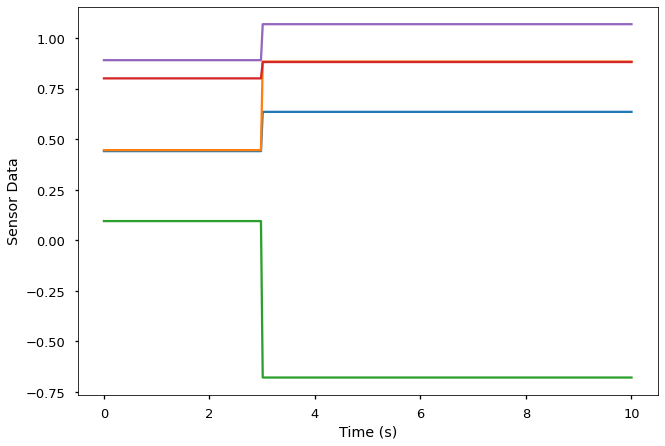

In [79]:
with plt.style.context('seaborn-talk'):
    plt.xlabel('Time (s)')
    plt.ylabel('Sensor Data')
    plt.plot(np.linspace(0, 10, 300), np.asanyarray(x).T);
    plt.savefig('steady_state_eg.pdf', bbox_inches='tight')